In [1]:
import os, sys
cur_dir = os.getcwd()
basename = os.path.basename(cur_dir)
for _ in range(5):
    if basename != 'OCLog':
        cur_dir = os.path.dirname(cur_dir)
        basename = os.path.basename(cur_dir)
        #print(cur_dir, basename)
    else:
        if cur_dir not in sys.path:
            sys.path.append(cur_dir)
            #print(sys.path)

In [28]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tqdm import trange, tqdm, tnrange
from oclog.BGL.bglog import BGLog, get_embedding_layer
from oclog.openset.boundary_loss import euclidean_metric, BoundaryLoss
from oclog.openset.pretraining import LogLineEncoder, LogSeqEncoder, LogClassifier
from oclog.openset.openset import OpenSet
from oclog.openset.opensetv2 import OpenSet as osetv2
from sklearn.metrics import confusion_matrix, f1_score, accuracy_score
import sklearn.metrics as m

In [3]:
bglog = BGLog(save_padded_num_sequences=False, load_from_pkl=True, )
train_test = bglog.get_tensor_train_test(ablation=1000)
train_data, test_data = train_test

padded_num_seq_df loaded from C:\Users\Bhujay_ROG\MyDev\OCLog\oclog\BGL\data\bgl_padded_num_seq_df.pkl
trained tokenizer, tk, loaded from C:\Users\Bhujay_ROG\MyDev\OCLog\oclog\BGL\data\bgltk.pkl
train_0:, 800
test_0:, 200
train_1:, 800
test_1:, 200
train_2:, 800
test_2:, 200
train_3:, 800
test_3:, 102
4 class does not have 800 records, it has only 628 records
test_4:, 0
5 class does not have 800 records, it has only 165 records
5 class does not have 200 records, it has only 165 records
6 class does not have 800 records, it has only 75 records
6 class does not have 200 records, it has only 75 records
[[1. 0. 0. 0.]
 [1. 0. 0. 0.]]
<BatchDataset element_spec=(TensorSpec(shape=(32, 32, 64), dtype=tf.int32, name=None), TensorSpec(shape=(32, 4), dtype=tf.float32, name=None))>
<BatchDataset element_spec=(TensorSpec(shape=(32, 32, 64), dtype=tf.int32, name=None), TensorSpec(shape=(32, 4), dtype=tf.float32, name=None))>


In [4]:
line_encoder = LogLineEncoder(bglog, chars_in_line=64)
logSeqencer =  LogSeqEncoder(line_in_seq=32)
ptmodel = LogClassifier(line_encoder=line_encoder, seq_encoder=logSeqencer, num_classes=4)
ptmodel.compile(optimizer='adam', loss='categorical_crossentropy',
              metrics=['accuracy', tf.keras.metrics.Precision(), tf.keras.metrics.Recall()])
hist = ptmodel.fit(train_data, validation_data=test_data, epochs=15) 

vocab_size: 50
Epoch 1/15
100/100 [==============================] - 11s 102ms/step - loss: 0.4636 - accuracy: 0.8128 - precision: 0.8919 - recall: 0.7347 - val_loss: 0.0431 - val_accuracy: 0.9866 - val_precision: 0.9896 - val_recall: 0.9866
Epoch 2/15
100/100 [==============================] - 10s 98ms/step - loss: 0.0713 - accuracy: 0.9787 - precision: 0.9787 - recall: 0.9772 - val_loss: 0.0142 - val_accuracy: 0.9955 - val_precision: 0.9970 - val_recall: 0.9940
Epoch 3/15
100/100 [==============================] - 10s 98ms/step - loss: 0.0291 - accuracy: 0.9884 - precision: 0.9884 - recall: 0.9881 - val_loss: 0.0034 - val_accuracy: 1.0000 - val_precision: 1.0000 - val_recall: 1.0000
Epoch 4/15
100/100 [==============================] - 10s 98ms/step - loss: 0.0234 - accuracy: 0.9922 - precision: 0.9922 - recall: 0.9912 - val_loss: 0.0047 - val_accuracy: 0.9985 - val_precision: 0.9985 - val_recall: 0.9985
Epoch 5/15
100/100 [==============================] - 10s 98ms/step - loss: 0.00

100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:13<00:00,  7.37it/s]


epoch: 1/25, train_loss: 7.1998515129089355


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:13<00:00,  7.33it/s]


epoch: 2/25, train_loss: 7.1998443603515625


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:13<00:00,  7.43it/s]


epoch: 3/25, train_loss: 7.199845790863037


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:13<00:00,  7.45it/s]


epoch: 4/25, train_loss: 7.199850082397461


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:13<00:00,  7.44it/s]


epoch: 5/25, train_loss: 7.199848175048828


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:13<00:00,  7.34it/s]


epoch: 6/25, train_loss: 7.199841499328613


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:13<00:00,  7.50it/s]


epoch: 7/25, train_loss: 7.199847221374512


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:13<00:00,  7.54it/s]


epoch: 8/25, train_loss: 7.199846267700195


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:13<00:00,  7.54it/s]


epoch: 9/25, train_loss: 7.199851036071777


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:13<00:00,  7.51it/s]


epoch: 10/25, train_loss: 7.199854850769043


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:13<00:00,  7.38it/s]


epoch: 11/25, train_loss: 7.199840068817139


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:13<00:00,  7.43it/s]


epoch: 12/25, train_loss: 7.199841499328613


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:13<00:00,  7.55it/s]


epoch: 13/25, train_loss: 7.199844837188721


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:13<00:00,  7.54it/s]


epoch: 14/25, train_loss: 7.199846267700195


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:13<00:00,  7.55it/s]


epoch: 15/25, train_loss: 7.199850559234619


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:13<00:00,  7.56it/s]


epoch: 16/25, train_loss: 7.19985818862915


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:13<00:00,  7.52it/s]


epoch: 17/25, train_loss: 7.199850082397461


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:13<00:00,  7.50it/s]


epoch: 18/25, train_loss: 7.1998491287231445


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:13<00:00,  7.45it/s]


epoch: 19/25, train_loss: 7.199850082397461


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:13<00:00,  7.47it/s]


epoch: 20/25, train_loss: 7.1998491287231445


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:13<00:00,  7.50it/s]


epoch: 21/25, train_loss: 7.199850559234619


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:13<00:00,  7.49it/s]


epoch: 22/25, train_loss: 7.199854850769043


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:13<00:00,  7.50it/s]


epoch: 23/25, train_loss: 7.199850082397461


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:13<00:00,  7.46it/s]


epoch: 24/25, train_loss: 7.1998515129089355


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:13<00:00,  7.30it/s]


epoch: 25/25, train_loss: 7.199838161468506


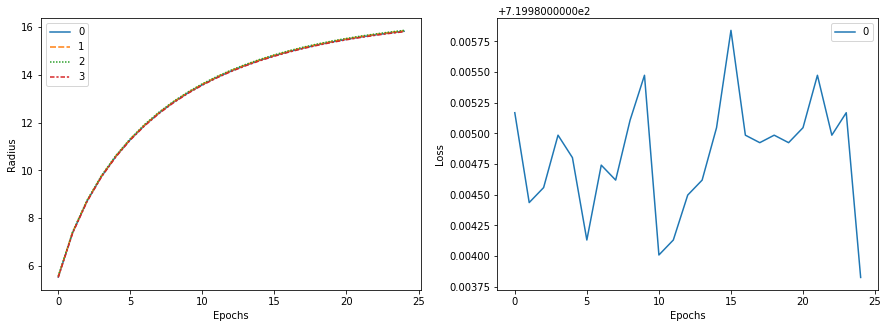

In [5]:
# oset = OpenSet(4, ptmodel) 
oset = osetv2(4, ptmodel)
_, _ = oset.train(train_data, epochs=25, lr_rate = 5)
# print(oset.radius_changes[0], oset.radius_changes[len(oset.radius_changes)-1])
# print(oset.openpredict(oset.features))

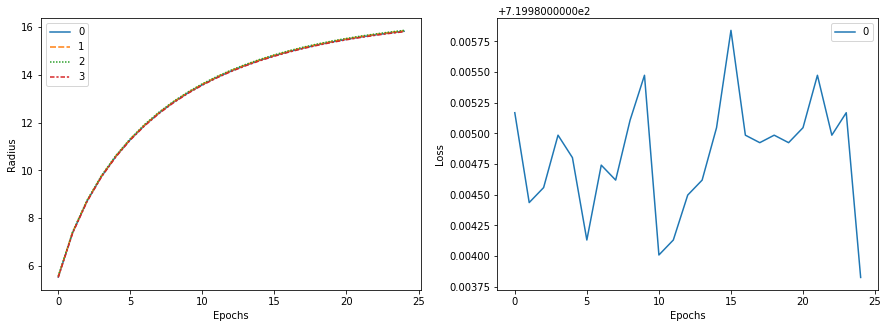

euc_dis: tf.Tensor(
[ 2.5705884 18.350594   1.4909902  3.9809945 14.254687   2.1459222
  3.9640346 10.482719   2.985548   7.1880627 12.314648   7.358016
 10.849212   4.0645328  6.2844     3.121874   6.3431425  2.961231
 28.355705   7.3235316  3.4428322  6.2601466  3.6238873  9.857034
  2.140603  14.072177   6.604178   1.5382895  7.593089   9.319488
  2.504296  28.355705 ], shape=(32,), dtype=float32)
pred_radius: tf.Tensor(
[15.853074 15.834447 15.853074 15.853074 15.834447 15.813618 15.796025
 15.834447 15.813618 15.796025 15.834447 15.853074 15.853074 15.853074
 15.834447 15.853074 15.853074 15.813618 15.834447 15.853074 15.813618
 15.796025 15.853074 15.834447 15.853074 15.796025 15.796025 15.853074
 15.796025 15.834447 15.813618 15.834447], shape=(32,), dtype=float32)
predictions with unknown-9999: [   2 9999    2    2    1    0    3    1    0    3    1    2    2    2
    1    2    2    0 9999    2    0    3    2    1    2    3    3    2
    3    1    0 9999]


In [6]:
oset.plot_radius_chages()
# print(oset.radius_changes[0], oset.radius_changes[len(oset.radius_changes)-1])
preds = oset.openpredict(oset.features)

In [10]:
y_true, y_pred = oset.evaluate(train_data)

100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:04<00:00, 24.54it/s]

[[800   0   0   0   0]
 [  0 621   0   0 179]
 [  0   0 794   0   6]
 [  0   0   0 739  61]
 [  0   0   0   0   0]]
92.31


In [25]:
f1_weighted = f1_score(y_true, y_pred, average="weighted")
f1_macro = f1_score(y_true, y_pred, average="macro")
f1_micro = f1_score(y_true, y_pred, average="micro")
print(f'f1_weighted: {f1_weighted}, f1_macro: {f1_macro}, f1_micro: {f1_micro}')

f1_weighted: 0.9576580321952545, f1_macro: 0.7661264257562037, f1_micro: 0.923125


In [27]:
cls_report = m.classification_report(y_true, y_pred)
print(cls_report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       800
           1       1.00      0.78      0.87       800
           2       1.00      0.99      1.00       800
           3       1.00      0.92      0.96       800
        9999       0.00      0.00      0.00         0

    accuracy                           0.92      3200
   macro avg       0.80      0.74      0.77      3200
weighted avg       1.00      0.92      0.96      3200



C:\Users\Bhujay_ROG\venv1\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Bhujay_ROG\venv1\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Bhujay_ROG\venv1\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [8]:
#ValueError: Target is multiclass but average='binary'. Please choose another average setting, one of [None, 'micro', 'macro', 'weighted'].